In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

import numpy as np
import networkx as nx

import indices_dec_tree
from indices_dec_tree.networks import NetworkData, NetworkUtils
from indices_dec_tree.centralities_batch import CentralityBatchAnalyzer
from indices_dec_tree.dec_tree_construction import CentralityDistinguisher, construct_dec_tree
from indices_dec_tree.network_draw import draw_as_graphviz

# Example of calculating measures of centrality

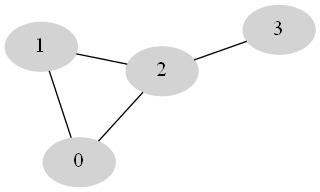

In [2]:
ex_G = NetworkData.get_lollipop_graph()
draw_as_graphviz(ex_G)

In [3]:
import pandas as pd

cba = CentralityBatchAnalyzer(ex_G)
cba.compute_centralities(precision=3)

scores, _ = cba.get_scores()
scores_df = pd.DataFrame(data=scores[1:], columns=scores[0], index=cba.centrality_identifiers)
scores_df.style.set_caption('Vertex centralities').set_properties(**{'font-size': '6pt'})

,0,1,2,3
bet,0.000000,0.000000,2.000000,0.000000
bonacich,11.598000,11.598000,14.030000,6.255000
deg,0.667000,0.667000,1.000000,0.333000
gen_deg,2.074000,2.074000,2.111000,1.741000
eig,0.523000,0.523000,0.612000,0.282000
katz,3.151000,3.151000,3.669000,2.157000
pr,0.246000,0.246000,0.367000,0.141000
conn,3.000000,3.000000,6.000000,2.000000
conn_pow,6.000000,6.000000,8.000000,5.000000
clo,0.750000,0.750000,1.000000,0.600000


# Example of decision tree construction

In [4]:
%%time

precision = 6

# geng_path - path to geng utility (http://users.cecs.anu.edu.au/~bdm/nauty/)
# geng_path = None - simple u-tree generator
geng_path = [None, "%UserProfile%/anaconda3/pkgs/nauty-2.6.11-h2fa13f4_1/Library/bin/geng.exe"][0]

cd = CentralityDistinguisher(min_nodes=4, med_nodes=8, max_nodes=11, precision=precision, geng_path=geng_path)
tree = construct_dec_tree(cd)

CPU times: total: 4.33 s
Wall time: 4.91 s


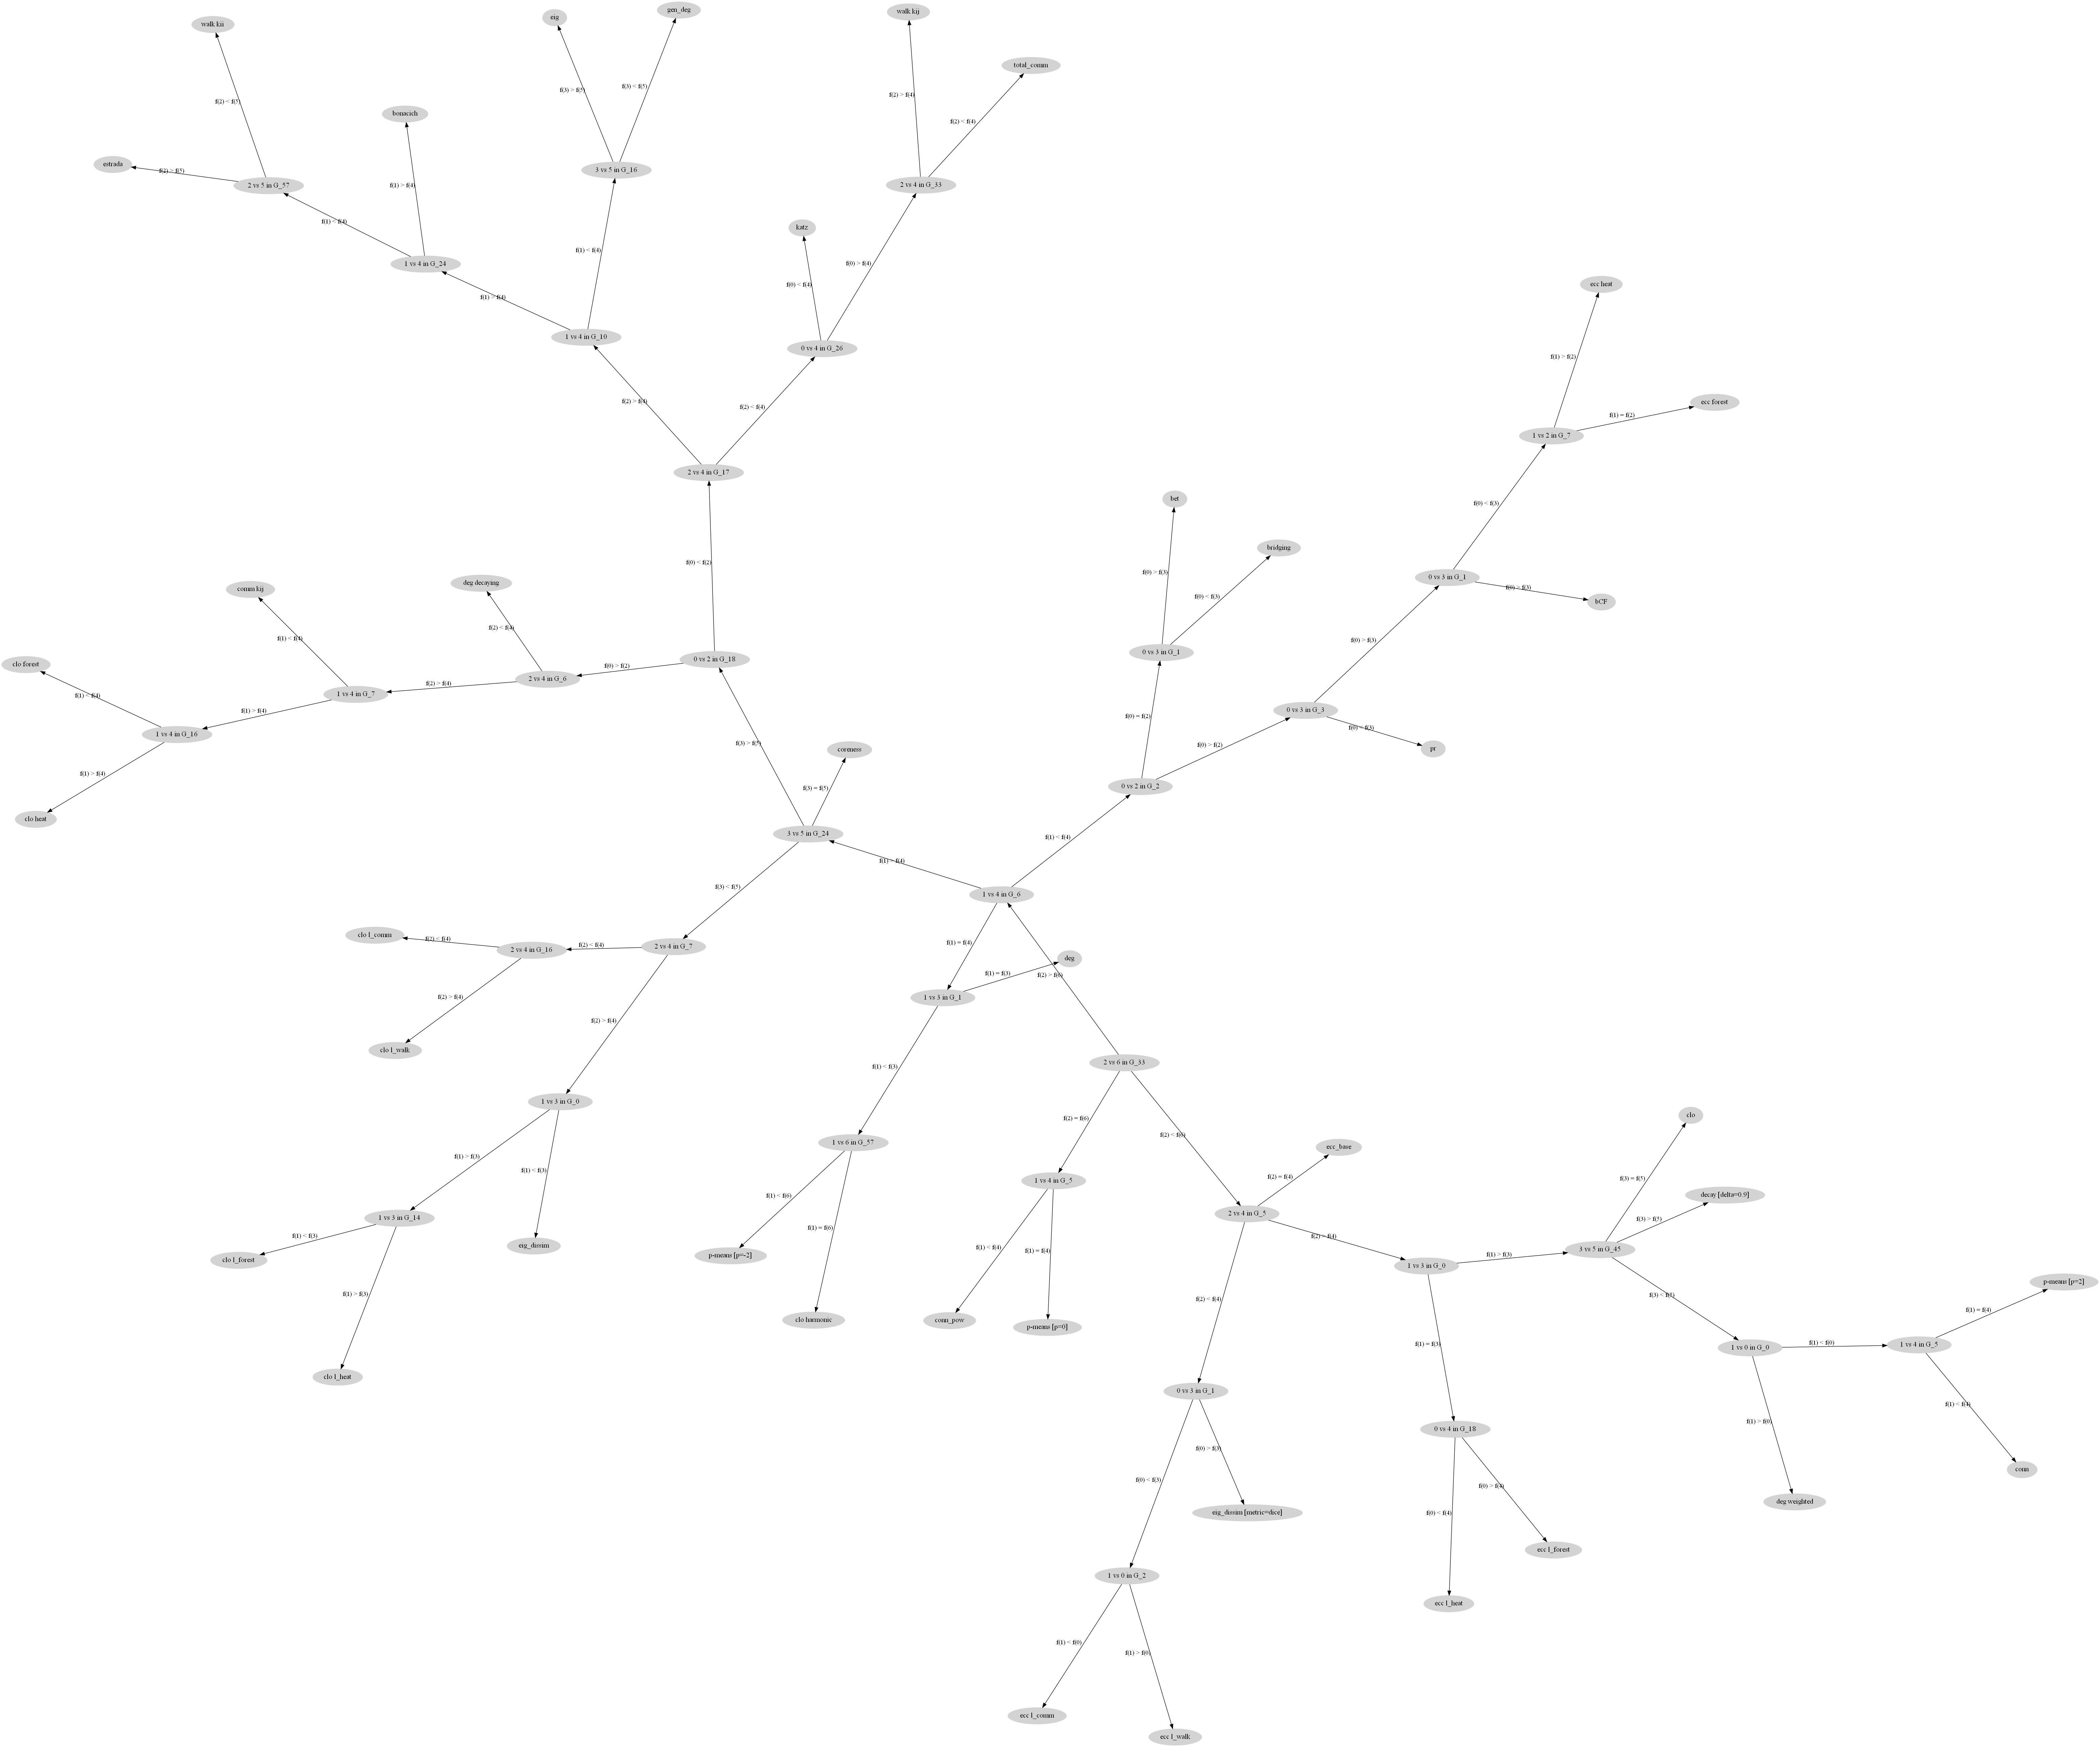

In [5]:
# Decision tree visualization

draw_as_graphviz(tree)

58
Graph G_2


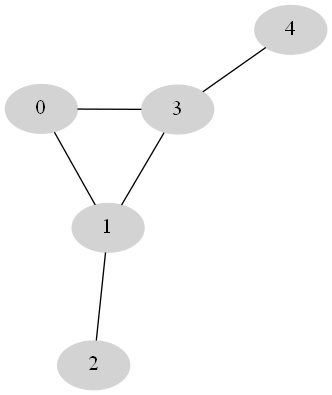

In [6]:
# Graph visualization (G_2) for a tree node

print(len(cd.graphs))

selected_i = 2
print(f'Graph G_{selected_i}')
G = cd.graphs[selected_i]
draw_as_graphviz(G)